In [1]:
from datasets import LungDataset, LungInfectedDataset, LungCovidDataset
from densenet import DenseNet
import utils

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms

### Classifier 1 (Normal/Infected)

In [2]:
# Define data loader arguments
train_transform = transforms.Compose([
    transforms.RandomResizedCrop((150, 150), scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333)),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1),
    transforms.ToTensor(),
])

test_transform = transforms.ToTensor()

dataloader_args = {
    'dataset_cls'    : LungInfectedDataset,
    'root_dir'       : './dataset',
    'train_transform': train_transform,
    'test_transform' : test_transform,
    'batch_size'     : 64,
}

In [3]:
# Define model arguments
model_args = {
    'num_input_channels': 1,
    'growth_rate'       : 8,
    'block_config'      : (4, 8, 16, 12),
    'num_init_features' : 16,
    'bn_size'           : 4,
    'drop_rate'         : 0,
    'num_classes'       : 2,
}

In [3]:
# Define training arguments
def lr_scheduler(epoch, learning_rate):
    if epoch % 20 == 0:
        learning_rate /= 10
    return learning_rate

training_args = {
    'device'       :'cuda',
    'epochs'       : 50,
    'optimizer'    : 'Adam',
    'learning_rate': 0.01,
    'lr_scheduler' : lr_scheduler,
    'save_interval': 30,
    'model_path'   : './models/dual-binary-classifier-1.pt',
    'history_path' : './history/dual-binary-classifier-1.pickle',
}

In [4]:
# Create data loaders
train_loader, test_loader, val_loader = utils.get_dataloaders(**dataloader_args)

In [6]:
# Instantiate model
model = DenseNet(**model_args)

In [7]:
# Carry out training on the model
history = utils.train_model(model, train_loader, test_loader, **training_args)

[Mon Mar 22 04:09:14 2021] Training started


[Mon Mar 22 04:09:26 2021] Time elapsed: 0:12 - loss: 0.117 - acc: 0.900 - recall: 0.960 - f1: 0.945 - test_loss: 1.835 - test_acc: 0.220 - test_recall: 0.124 - test_f1: 0.115


[Mon Mar 22 04:09:37 2021] Time elapsed: 0:23 - loss: 0.075 - acc: 0.942 - recall: 0.973 - f1: 0.970 - test_loss: 0.315 - test_acc: 0.848 - test_recall: 0.873 - test_f1: 0.892


[Mon Mar 22 04:09:48 2021] Time elapsed: 0:34 - loss: 0.058 - acc: 0.960 - recall: 0.981 - f1: 0.980 - test_loss: 0.539 - test_acc: 0.822 - test_recall: 0.929 - test_f1: 0.896


[Mon Mar 22 04:09:59 2021] Time elapsed: 0:45 - loss: 0.044 - acc: 0.969 - recall: 0.986 - f1: 0.985 - test_loss: 0.475 - test_acc: 0.858 - test_recall: 0.945 - test_f1: 0.919


[Mon Mar 22 04:10:10 2021] Time elapsed: 0:56 - loss: 0.046 - acc: 0.968 - recall: 0.985 - f1: 0.984 - test_loss: 0.377 - test_acc: 0.811 - test_recall: 0.925 - test_f1: 0.891


[Mon Mar 22 04:10:21 2021] Time elapsed: 1:07 - loss: 0.039 - acc: 0.974 - recall: 0.988 - f1: 0.988 - test_loss: 2.895 - test_acc: 0.444 - test_recall: 0.379 - test_f1: 0.468


[Mon Mar 22 04:10:32 2021] Time elapsed: 1:18 - loss: 0.041 - acc: 0.973 - recall: 0.987 - f1: 0.987 - test_loss: 1.481 - test_acc: 0.530 - test_recall: 0.528 - test_f1: 0.635


[Mon Mar 22 04:10:43 2021] Time elapsed: 1:29 - loss: 0.036 - acc: 0.975 - recall: 0.988 - f1: 0.988 - test_loss: 0.164 - test_acc: 0.880 - test_recall: 0.941 - test_f1: 0.935


[Mon Mar 22 04:10:54 2021] Time elapsed: 1:40 - loss: 0.034 - acc: 0.977 - recall: 0.989 - f1: 0.988 - test_loss: 0.535 - test_acc: 0.830 - test_recall: 0.932 - test_f1: 0.900


[Mon Mar 22 04:11:05 2021] Time elapsed: 1:51 - loss: 0.035 - acc: 0.975 - recall: 0.988 - f1: 0.988 - test_loss: 0.458 - test_acc: 0.824 - test_recall: 0.930 - test_f1: 0.900


[Mon Mar 22 04:11:16 2021] Time elapsed: 2:02 - loss: 0.028 - acc: 0.982 - recall: 0.992 - f1: 0.991 - test_loss: 0.220 - test_acc: 0.882 - test_recall: 0.951 - test_f1: 0.940


[Mon Mar 22 04:11:27 2021] Time elapsed: 2:13 - loss: 0.029 - acc: 0.982 - recall: 0.991 - f1: 0.992 - test_loss: 0.581 - test_acc: 0.798 - test_recall: 0.796 - test_f1: 0.840


[Mon Mar 22 04:11:38 2021] Time elapsed: 2:24 - loss: 0.022 - acc: 0.984 - recall: 0.993 - f1: 0.993 - test_loss: 0.930 - test_acc: 0.821 - test_recall: 0.929 - test_f1: 0.895


[Mon Mar 22 04:11:49 2021] Time elapsed: 2:35 - loss: 0.021 - acc: 0.986 - recall: 0.994 - f1: 0.994 - test_loss: 0.248 - test_acc: 0.870 - test_recall: 0.929 - test_f1: 0.926


[Mon Mar 22 04:12:00 2021] Time elapsed: 2:46 - loss: 0.028 - acc: 0.982 - recall: 0.991 - f1: 0.991 - test_loss: 0.392 - test_acc: 0.833 - test_recall: 0.934 - test_f1: 0.905


[Mon Mar 22 04:12:11 2021] Time elapsed: 2:57 - loss: 0.022 - acc: 0.986 - recall: 0.993 - f1: 0.993 - test_loss: 1.182 - test_acc: 0.641 - test_recall: 0.643 - test_f1: 0.732


[Mon Mar 22 04:12:22 2021] Time elapsed: 3:08 - loss: 0.023 - acc: 0.984 - recall: 0.992 - f1: 0.992 - test_loss: 0.227 - test_acc: 0.883 - test_recall: 0.950 - test_f1: 0.940


[Mon Mar 22 04:12:33 2021] Time elapsed: 3:19 - loss: 0.026 - acc: 0.981 - recall: 0.990 - f1: 0.990 - test_loss: 4.033 - test_acc: 0.299 - test_recall: 0.231 - test_f1: 0.298


[Mon Mar 22 04:12:44 2021] Time elapsed: 3:30 - loss: 0.021 - acc: 0.986 - recall: 0.994 - f1: 0.994 - test_loss: 0.548 - test_acc: 0.809 - test_recall: 0.921 - test_f1: 0.890


[Mon Mar 22 04:12:55 2021] Time elapsed: 3:41 - loss: 0.017 - acc: 0.990 - recall: 0.995 - f1: 0.995 - test_loss: 0.459 - test_acc: 0.834 - test_recall: 0.934 - test_f1: 0.907


[Mon Mar 22 04:13:07 2021] Time elapsed: 3:52 - loss: 0.011 - acc: 0.991 - recall: 0.996 - f1: 0.996 - test_loss: 0.309 - test_acc: 0.869 - test_recall: 0.949 - test_f1: 0.930


[Mon Mar 22 04:13:17 2021] Time elapsed: 4:03 - loss: 0.013 - acc: 0.990 - recall: 0.996 - f1: 0.996 - test_loss: 0.355 - test_acc: 0.853 - test_recall: 0.943 - test_f1: 0.920


[Mon Mar 22 04:13:28 2021] Time elapsed: 4:14 - loss: 0.014 - acc: 0.990 - recall: 0.995 - f1: 0.995 - test_loss: 0.429 - test_acc: 0.833 - test_recall: 0.933 - test_f1: 0.910


[Mon Mar 22 04:13:39 2021] Time elapsed: 4:25 - loss: 0.010 - acc: 0.994 - recall: 0.997 - f1: 0.997 - test_loss: 0.340 - test_acc: 0.861 - test_recall: 0.942 - test_f1: 0.927


[Mon Mar 22 04:13:50 2021] Time elapsed: 4:36 - loss: 0.009 - acc: 0.993 - recall: 0.997 - f1: 0.997 - test_loss: 0.314 - test_acc: 0.879 - test_recall: 0.952 - test_f1: 0.939


[Mon Mar 22 04:14:01 2021] Time elapsed: 4:47 - loss: 0.010 - acc: 0.992 - recall: 0.997 - f1: 0.997 - test_loss: 0.301 - test_acc: 0.880 - test_recall: 0.952 - test_f1: 0.940


[Mon Mar 22 04:14:12 2021] Time elapsed: 4:58 - loss: 0.009 - acc: 0.993 - recall: 0.997 - f1: 0.997 - test_loss: 0.355 - test_acc: 0.878 - test_recall: 0.952 - test_f1: 0.935


[Mon Mar 22 04:14:23 2021] Time elapsed: 5:09 - loss: 0.008 - acc: 0.995 - recall: 0.998 - f1: 0.998 - test_loss: 0.337 - test_acc: 0.860 - test_recall: 0.940 - test_f1: 0.927


[Mon Mar 22 04:14:35 2021] Time elapsed: 5:21 - loss: 0.007 - acc: 0.996 - recall: 0.998 - f1: 0.998 - test_loss: 0.549 - test_acc: 0.836 - test_recall: 0.935 - test_f1: 0.910


[Mon Mar 22 04:14:46 2021] Time elapsed: 5:32 - loss: 0.009 - acc: 0.994 - recall: 0.997 - f1: 0.997 - test_loss: 0.259 - test_acc: 0.905 - test_recall: 0.963 - test_f1: 0.954


[Mon Mar 22 04:14:57 2021] Time elapsed: 5:43 - loss: 0.006 - acc: 0.996 - recall: 0.998 - f1: 0.998 - test_loss: 0.388 - test_acc: 0.870 - test_recall: 0.949 - test_f1: 0.934


[Mon Mar 22 04:15:08 2021] Time elapsed: 5:54 - loss: 0.008 - acc: 0.993 - recall: 0.997 - f1: 0.997 - test_loss: 0.462 - test_acc: 0.860 - test_recall: 0.946 - test_f1: 0.925


[Mon Mar 22 04:15:19 2021] Time elapsed: 6:05 - loss: 0.007 - acc: 0.995 - recall: 0.998 - f1: 0.998 - test_loss: 0.271 - test_acc: 0.888 - test_recall: 0.952 - test_f1: 0.942


[Mon Mar 22 04:15:30 2021] Time elapsed: 6:16 - loss: 0.007 - acc: 0.995 - recall: 0.998 - f1: 0.998 - test_loss: 0.320 - test_acc: 0.889 - test_recall: 0.955 - test_f1: 0.944


[Mon Mar 22 04:15:41 2021] Time elapsed: 6:27 - loss: 0.007 - acc: 0.994 - recall: 0.997 - f1: 0.997 - test_loss: 0.339 - test_acc: 0.887 - test_recall: 0.954 - test_f1: 0.942


[Mon Mar 22 04:15:52 2021] Time elapsed: 6:38 - loss: 0.006 - acc: 0.996 - recall: 0.998 - f1: 0.998 - test_loss: 0.317 - test_acc: 0.881 - test_recall: 0.952 - test_f1: 0.940


[Mon Mar 22 04:16:03 2021] Time elapsed: 6:49 - loss: 0.004 - acc: 0.997 - recall: 0.999 - f1: 0.999 - test_loss: 0.382 - test_acc: 0.874 - test_recall: 0.951 - test_f1: 0.933


[Mon Mar 22 04:16:14 2021] Time elapsed: 7:00 - loss: 0.005 - acc: 0.996 - recall: 0.998 - f1: 0.998 - test_loss: 0.610 - test_acc: 0.826 - test_recall: 0.930 - test_f1: 0.902


[Mon Mar 22 04:16:25 2021] Time elapsed: 7:11 - loss: 0.006 - acc: 0.996 - recall: 0.998 - f1: 0.998 - test_loss: 0.365 - test_acc: 0.886 - test_recall: 0.953 - test_f1: 0.942


[Mon Mar 22 04:16:36 2021] Time elapsed: 7:22 - loss: 0.004 - acc: 0.997 - recall: 0.999 - f1: 0.999 - test_loss: 0.512 - test_acc: 0.856 - test_recall: 0.940 - test_f1: 0.923


[Mon Mar 22 04:16:47 2021] Time elapsed: 7:33 - loss: 0.003 - acc: 0.998 - recall: 0.999 - f1: 0.999 - test_loss: 0.365 - test_acc: 0.883 - test_recall: 0.952 - test_f1: 0.941


[Mon Mar 22 04:16:57 2021] Time elapsed: 7:43 - loss: 0.003 - acc: 0.999 - recall: 1.000 - f1: 1.000 - test_loss: 0.414 - test_acc: 0.869 - test_recall: 0.946 - test_f1: 0.933


[Mon Mar 22 04:17:09 2021] Time elapsed: 7:55 - loss: 0.004 - acc: 0.997 - recall: 0.999 - f1: 0.999 - test_loss: 0.393 - test_acc: 0.882 - test_recall: 0.953 - test_f1: 0.940


[Mon Mar 22 04:17:20 2021] Time elapsed: 8:06 - loss: 0.002 - acc: 1.000 - recall: 1.000 - f1: 1.000 - test_loss: 0.424 - test_acc: 0.870 - test_recall: 0.947 - test_f1: 0.932


[Mon Mar 22 04:17:31 2021] Time elapsed: 8:17 - loss: 0.003 - acc: 0.998 - recall: 0.999 - f1: 0.999 - test_loss: 0.341 - test_acc: 0.886 - test_recall: 0.955 - test_f1: 0.942


[Mon Mar 22 04:17:42 2021] Time elapsed: 8:28 - loss: 0.003 - acc: 0.998 - recall: 0.999 - f1: 0.999 - test_loss: 0.392 - test_acc: 0.881 - test_recall: 0.951 - test_f1: 0.940


[Mon Mar 22 04:17:53 2021] Time elapsed: 8:38 - loss: 0.002 - acc: 0.999 - recall: 1.000 - f1: 1.000 - test_loss: 0.353 - test_acc: 0.896 - test_recall: 0.960 - test_f1: 0.949


[Mon Mar 22 04:18:04 2021] Time elapsed: 8:49 - loss: 0.003 - acc: 0.998 - recall: 0.999 - f1: 0.999 - test_loss: 0.431 - test_acc: 0.881 - test_recall: 0.951 - test_f1: 0.939


[Mon Mar 22 04:18:14 2021] Time elapsed: 9:00 - loss: 0.002 - acc: 0.998 - recall: 0.999 - f1: 0.999 - test_loss: 0.406 - test_acc: 0.868 - test_recall: 0.947 - test_f1: 0.932


[Mon Mar 22 04:18:26 2021] Time elapsed: 9:12 - loss: 0.002 - acc: 0.999 - recall: 0.999 - f1: 0.999 - test_loss: 0.424 - test_acc: 0.873 - test_recall: 0.948 - test_f1: 0.935

[Mon Mar 22 04:18:26 2021] Training complete - Time elapsed: 9:12


In [8]:
# Save the results of training
utils.save_model(model, training_args['model_path'])

utils.save_history(history, training_args['history_path'])

In [5]:
# Load the results of training
model = utils.load_model(training_args['model_path'])

history = utils.load_history(training_args['history_path'])

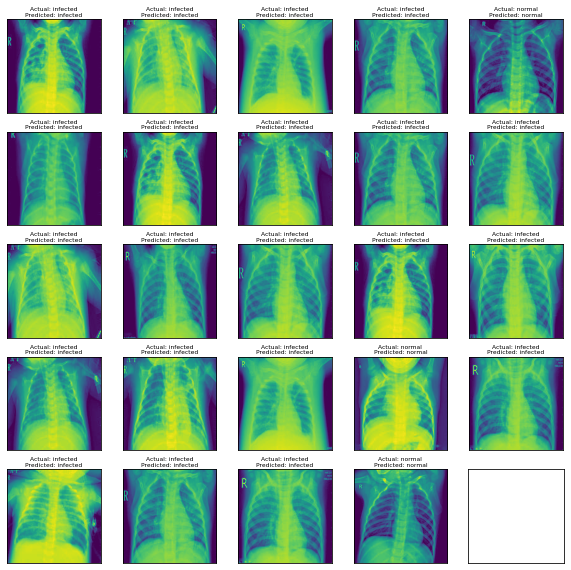

Validation loss: 0.010 - Validation accuracy: 1.000 - Validation F1-score: 1.000 - Validation recall: 1.000


In [10]:
# Evaluate the performance of the model on the validation set
model.cuda()

results = utils.run_model(model, val_loader, show_results=True)

print(f"Validation loss: {results['loss']:.3f} -",
      f"Validation accuracy: {results['accuracy']:.3f} -",
      f"Validation F1-score: {results['f1']:.3f} -",
      f"Validation recall: {results['recall']:.3f}")

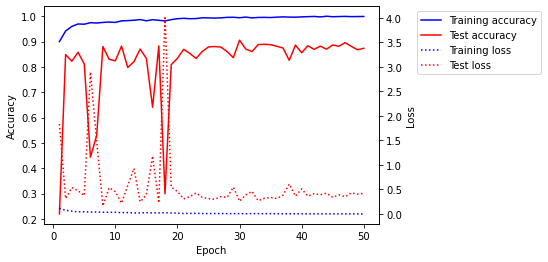

In [6]:
# Plot the training history
utils.plot_history(history, metric='accuracy')

### Classifier 2 (Non-Covid/Covid)

In [7]:
# Define data loader arguments
train_transform = transforms.Compose([
    transforms.RandomResizedCrop((150, 150), scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333)),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1),
    transforms.ToTensor(),
])

test_transform = transforms.ToTensor()

dataloader_args = {
    'dataset_cls'    : LungCovidDataset,
    'root_dir'       : './dataset',
    'train_transform': train_transform,
    'test_transform' : test_transform,
    'batch_size'     : 64,
}

In [25]:
# Define model arguments
model_args = {
    'num_input_channels': 1,
    'growth_rate'       : 8,
    'block_config'      : (6, 12, 24, 18),
    'num_init_features' : 16,
    'bn_size'           : 4,
    'drop_rate'         : 0,
    'num_classes'       : 2,
}

In [8]:
# Define training arguments
def lr_scheduler(epoch, learning_rate):
    if epoch % 20 == 0:
        learning_rate /= 10
    return learning_rate

training_args = {
    'device'       :'cuda',
    'epochs'       : 50,
    'optimizer'    : 'Adam',
    'learning_rate': 0.01,
    'lr_scheduler' : lr_scheduler,
    'save_interval': 30,
    'model_path'   : './models/dual-binary-classifier-2.pt',
    'history_path' : './history/dual-binary-classifier-2.pickle',
}

In [9]:
# Create data loaders
train_loader, test_loader, val_loader = utils.get_dataloaders(**dataloader_args)

In [28]:
# Instantiate model
model = DenseNet(**model_args)

In [29]:
# Carry out training on the model
history = utils.train_model(model, train_loader, test_loader, **training_args)

[Mon Mar 22 08:25:03 2021] Training started


[Mon Mar 22 08:25:13 2021] Time elapsed: 0:09 - loss: 0.398 - acc: 0.768 - recall: 0.854 - f1: 0.794 - test_loss: 0.533 - test_acc: 0.774 - test_recall: 0.865 - test_f1: 0.803


[Mon Mar 22 08:25:22 2021] Time elapsed: 0:19 - loss: 0.371 - acc: 0.777 - recall: 0.863 - f1: 0.810 - test_loss: 0.264 - test_acc: 0.839 - test_recall: 0.889 - test_f1: 0.876


[Mon Mar 22 08:25:31 2021] Time elapsed: 0:28 - loss: 0.369 - acc: 0.781 - recall: 0.863 - f1: 0.815 - test_loss: 0.482 - test_acc: 0.776 - test_recall: 0.865 - test_f1: 0.803


[Mon Mar 22 08:25:40 2021] Time elapsed: 0:37 - loss: 0.342 - acc: 0.796 - recall: 0.872 - f1: 0.834 - test_loss: 0.355 - test_acc: 0.797 - test_recall: 0.880 - test_f1: 0.825


[Mon Mar 22 08:25:50 2021] Time elapsed: 0:46 - loss: 0.352 - acc: 0.791 - recall: 0.869 - f1: 0.827 - test_loss: 0.501 - test_acc: 0.737 - test_recall: 0.840 - test_f1: 0.767


[Mon Mar 22 08:25:59 2021] Time elapsed: 0:55 - loss: 0.339 - acc: 0.794 - recall: 0.869 - f1: 0.836 - test_loss: 0.204 - test_acc: 0.877 - test_recall: 0.925 - test_f1: 0.912


[Mon Mar 22 08:26:08 2021] Time elapsed: 1:05 - loss: 0.324 - acc: 0.814 - recall: 0.884 - f1: 0.852 - test_loss: 0.266 - test_acc: 0.824 - test_recall: 0.894 - test_f1: 0.868


[Mon Mar 22 08:26:17 2021] Time elapsed: 1:14 - loss: 0.334 - acc: 0.803 - recall: 0.873 - f1: 0.842 - test_loss: 0.271 - test_acc: 0.847 - test_recall: 0.899 - test_f1: 0.888


[Mon Mar 22 08:26:27 2021] Time elapsed: 1:23 - loss: 0.334 - acc: 0.800 - recall: 0.874 - f1: 0.837 - test_loss: 0.245 - test_acc: 0.814 - test_recall: 0.889 - test_f1: 0.850


[Mon Mar 22 08:26:36 2021] Time elapsed: 1:32 - loss: 0.317 - acc: 0.807 - recall: 0.879 - f1: 0.845 - test_loss: 0.259 - test_acc: 0.842 - test_recall: 0.905 - test_f1: 0.883


[Mon Mar 22 08:26:45 2021] Time elapsed: 1:42 - loss: 0.320 - acc: 0.800 - recall: 0.871 - f1: 0.839 - test_loss: 0.309 - test_acc: 0.752 - test_recall: 0.850 - test_f1: 0.783


[Mon Mar 22 08:26:55 2021] Time elapsed: 1:51 - loss: 0.320 - acc: 0.796 - recall: 0.868 - f1: 0.838 - test_loss: 0.254 - test_acc: 0.887 - test_recall: 0.929 - test_f1: 0.919


[Mon Mar 22 08:27:04 2021] Time elapsed: 2:00 - loss: 0.321 - acc: 0.800 - recall: 0.871 - f1: 0.841 - test_loss: 0.247 - test_acc: 0.813 - test_recall: 0.887 - test_f1: 0.850


[Mon Mar 22 08:27:13 2021] Time elapsed: 2:09 - loss: 0.299 - acc: 0.819 - recall: 0.885 - f1: 0.858 - test_loss: 0.421 - test_acc: 0.792 - test_recall: 0.877 - test_f1: 0.820


[Mon Mar 22 08:27:23 2021] Time elapsed: 2:19 - loss: 0.303 - acc: 0.818 - recall: 0.882 - f1: 0.858 - test_loss: 0.231 - test_acc: 0.863 - test_recall: 0.908 - test_f1: 0.900



[Mon Mar 22 08:27:32 2021] Time elapsed: 2:28 - loss: 0.313 - acc: 0.812 - recall: 0.879 - f1: 0.853 - test_loss: 0.307 - test_acc: 0.773 - test_recall: 0.863 - test_f1: 0.807


[Mon Mar 22 08:27:41 2021] Time elapsed: 2:37 - loss: 0.298 - acc: 0.816 - recall: 0.881 - f1: 0.857 - test_loss: 0.401 - test_acc: 0.769 - test_recall: 0.862 - test_f1: 0.798


[Mon Mar 22 08:27:50 2021] Time elapsed: 2:46 - loss: 0.297 - acc: 0.820 - recall: 0.886 - f1: 0.858 - test_loss: 0.271 - test_acc: 0.826 - test_recall: 0.889 - test_f1: 0.870


[Mon Mar 22 08:27:59 2021] Time elapsed: 2:56 - loss: 0.296 - acc: 0.824 - recall: 0.885 - f1: 0.864 - test_loss: 0.195 - test_acc: 0.916 - test_recall: 0.946 - test_f1: 0.941


[Mon Mar 22 08:28:08 2021] Time elapsed: 3:05 - loss: 0.277 - acc: 0.829 - recall: 0.891 - f1: 0.869 - test_loss: 0.201 - test_acc: 0.858 - test_recall: 0.915 - test_f1: 0.896


[Mon Mar 22 08:28:18 2021] Time elapsed: 3:14 - loss: 0.271 - acc: 0.832 - recall: 0.893 - f1: 0.872 - test_loss: 0.219 - test_acc: 0.842 - test_recall: 0.902 - test_f1: 0.882


[Mon Mar 22 08:28:27 2021] Time elapsed: 3:23 - loss: 0.269 - acc: 0.842 - recall: 0.898 - f1: 0.881 - test_loss: 0.238 - test_acc: 0.827 - test_recall: 0.896 - test_f1: 0.867


[Mon Mar 22 08:28:36 2021] Time elapsed: 3:32 - loss: 0.268 - acc: 0.842 - recall: 0.897 - f1: 0.881 - test_loss: 0.230 - test_acc: 0.842 - test_recall: 0.907 - test_f1: 0.879


[Mon Mar 22 08:28:45 2021] Time elapsed: 3:42 - loss: 0.263 - acc: 0.842 - recall: 0.899 - f1: 0.882 - test_loss: 0.228 - test_acc: 0.861 - test_recall: 0.914 - test_f1: 0.899


[Mon Mar 22 08:28:54 2021] Time elapsed: 3:51 - loss: 0.274 - acc: 0.837 - recall: 0.893 - f1: 0.878 - test_loss: 0.240 - test_acc: 0.839 - test_recall: 0.900 - test_f1: 0.882


[Mon Mar 22 08:29:04 2021] Time elapsed: 4:00 - loss: 0.264 - acc: 0.844 - recall: 0.898 - f1: 0.884 - test_loss: 0.200 - test_acc: 0.858 - test_recall: 0.916 - test_f1: 0.896


[Mon Mar 22 08:29:13 2021] Time elapsed: 4:09 - loss: 0.252 - acc: 0.857 - recall: 0.906 - f1: 0.895 - test_loss: 0.233 - test_acc: 0.880 - test_recall: 0.928 - test_f1: 0.915


[Mon Mar 22 08:29:22 2021] Time elapsed: 4:19 - loss: 0.241 - acc: 0.862 - recall: 0.909 - f1: 0.899 - test_loss: 0.249 - test_acc: 0.829 - test_recall: 0.896 - test_f1: 0.867


[Mon Mar 22 08:29:31 2021] Time elapsed: 4:28 - loss: 0.240 - acc: 0.866 - recall: 0.914 - f1: 0.903 - test_loss: 0.221 - test_acc: 0.861 - test_recall: 0.918 - test_f1: 0.898


[Mon Mar 22 08:29:40 2021] Time elapsed: 4:37 - loss: 0.246 - acc: 0.863 - recall: 0.911 - f1: 0.900 - test_loss: 0.179 - test_acc: 0.903 - test_recall: 0.943 - test_f1: 0.934


[Mon Mar 22 08:29:50 2021] Time elapsed: 4:46 - loss: 0.246 - acc: 0.860 - recall: 0.908 - f1: 0.897 - test_loss: 0.219 - test_acc: 0.894 - test_recall: 0.937 - test_f1: 0.928


[Mon Mar 22 08:29:59 2021] Time elapsed: 4:55 - loss: 0.238 - acc: 0.870 - recall: 0.914 - f1: 0.905 - test_loss: 0.256 - test_acc: 0.850 - test_recall: 0.905 - test_f1: 0.891


[Mon Mar 22 08:30:08 2021] Time elapsed: 5:04 - loss: 0.238 - acc: 0.867 - recall: 0.912 - f1: 0.902 - test_loss: 0.167 - test_acc: 0.905 - test_recall: 0.943 - test_f1: 0.936


[Mon Mar 22 08:30:17 2021] Time elapsed: 5:14 - loss: 0.225 - acc: 0.874 - recall: 0.918 - f1: 0.909 - test_loss: 0.251 - test_acc: 0.864 - test_recall: 0.915 - test_f1: 0.903


[Mon Mar 22 08:30:26 2021] Time elapsed: 5:23 - loss: 0.221 - acc: 0.877 - recall: 0.919 - f1: 0.910 - test_loss: 0.212 - test_acc: 0.874 - test_recall: 0.919 - test_f1: 0.908


[Mon Mar 22 08:30:35 2021] Time elapsed: 5:32 - loss: 0.209 - acc: 0.885 - recall: 0.924 - f1: 0.917 - test_loss: 0.262 - test_acc: 0.860 - test_recall: 0.907 - test_f1: 0.896


[Mon Mar 22 08:30:45 2021] Time elapsed: 5:41 - loss: 0.211 - acc: 0.889 - recall: 0.928 - f1: 0.920 - test_loss: 0.277 - test_acc: 0.835 - test_recall: 0.892 - test_f1: 0.878


[Mon Mar 22 08:30:54 2021] Time elapsed: 5:50 - loss: 0.202 - acc: 0.891 - recall: 0.928 - f1: 0.921 - test_loss: 0.255 - test_acc: 0.842 - test_recall: 0.895 - test_f1: 0.882


[Mon Mar 22 08:31:03 2021] Time elapsed: 5:59 - loss: 0.189 - acc: 0.902 - recall: 0.935 - f1: 0.930 - test_loss: 0.305 - test_acc: 0.831 - test_recall: 0.885 - test_f1: 0.872


[Mon Mar 22 08:31:12 2021] Time elapsed: 6:09 - loss: 0.185 - acc: 0.900 - recall: 0.937 - f1: 0.931 - test_loss: 0.294 - test_acc: 0.839 - test_recall: 0.892 - test_f1: 0.881


[Mon Mar 22 08:31:22 2021] Time elapsed: 6:18 - loss: 0.162 - acc: 0.914 - recall: 0.945 - f1: 0.940 - test_loss: 0.271 - test_acc: 0.845 - test_recall: 0.891 - test_f1: 0.884


[Mon Mar 22 08:31:31 2021] Time elapsed: 6:27 - loss: 0.165 - acc: 0.916 - recall: 0.946 - f1: 0.942 - test_loss: 0.236 - test_acc: 0.845 - test_recall: 0.888 - test_f1: 0.881


[Mon Mar 22 08:31:40 2021] Time elapsed: 6:37 - loss: 0.150 - acc: 0.922 - recall: 0.951 - f1: 0.947 - test_loss: 0.234 - test_acc: 0.871 - test_recall: 0.914 - test_f1: 0.904


[Mon Mar 22 08:31:50 2021] Time elapsed: 6:46 - loss: 0.147 - acc: 0.925 - recall: 0.952 - f1: 0.949 - test_loss: 0.230 - test_acc: 0.869 - test_recall: 0.915 - test_f1: 0.905


[Mon Mar 22 08:31:59 2021] Time elapsed: 6:55 - loss: 0.159 - acc: 0.923 - recall: 0.950 - f1: 0.947 - test_loss: 0.217 - test_acc: 0.882 - test_recall: 0.922 - test_f1: 0.913


[Mon Mar 22 08:32:08 2021] Time elapsed: 7:05 - loss: 0.149 - acc: 0.927 - recall: 0.953 - f1: 0.950 - test_loss: 0.228 - test_acc: 0.863 - test_recall: 0.904 - test_f1: 0.897


[Mon Mar 22 08:32:17 2021] Time elapsed: 7:14 - loss: 0.146 - acc: 0.927 - recall: 0.953 - f1: 0.950 - test_loss: 0.267 - test_acc: 0.858 - test_recall: 0.904 - test_f1: 0.892


[Mon Mar 22 08:32:27 2021] Time elapsed: 7:23 - loss: 0.144 - acc: 0.928 - recall: 0.954 - f1: 0.951 - test_loss: 0.305 - test_acc: 0.840 - test_recall: 0.892 - test_f1: 0.881


[Mon Mar 22 08:32:36 2021] Time elapsed: 7:32 - loss: 0.145 - acc: 0.929 - recall: 0.954 - f1: 0.952 - test_loss: 0.262 - test_acc: 0.855 - test_recall: 0.902 - test_f1: 0.892


[Mon Mar 22 08:32:45 2021] Time elapsed: 7:41 - loss: 0.142 - acc: 0.933 - recall: 0.956 - f1: 0.954 - test_loss: 0.312 - test_acc: 0.852 - test_recall: 0.897 - test_f1: 0.889

[Mon Mar 22 08:32:45 2021] Training complete - Time elapsed: 7:41


In [30]:
# Save the results of training
utils.save_model(model, training_args['model_path'])

utils.save_history(history, training_args['history_path'])

In [10]:
# Load the results of training
model = utils.load_model(training_args['model_path'])

history = utils.load_history(training_args['history_path'])

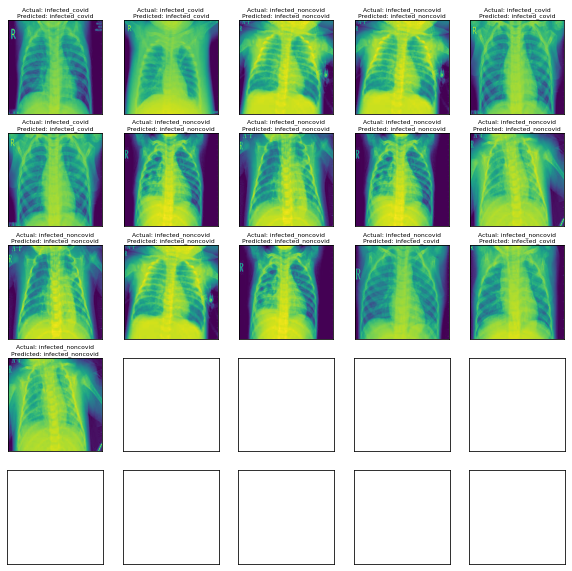

Validation loss: 0.782 - Validation accuracy: 0.875 - Validation F1-score: 0.875 - Validation recall: 0.858


In [32]:
# Evaluate the performance of the model on the validation set
model.cuda()

results = utils.run_model(model, val_loader, show_results=True)

print(f"Validation loss: {results['loss']:.3f} -",
      f"Validation accuracy: {results['accuracy']:.3f} -",
      f"Validation F1-score: {results['f1']:.3f} -",
      f"Validation recall: {results['recall']:.3f}")

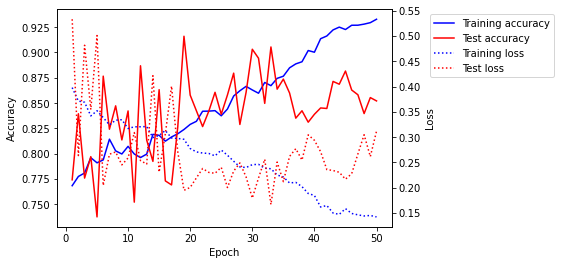

In [11]:
# Plot the training history
utils.plot_history(history, metric='accuracy')

### Combined

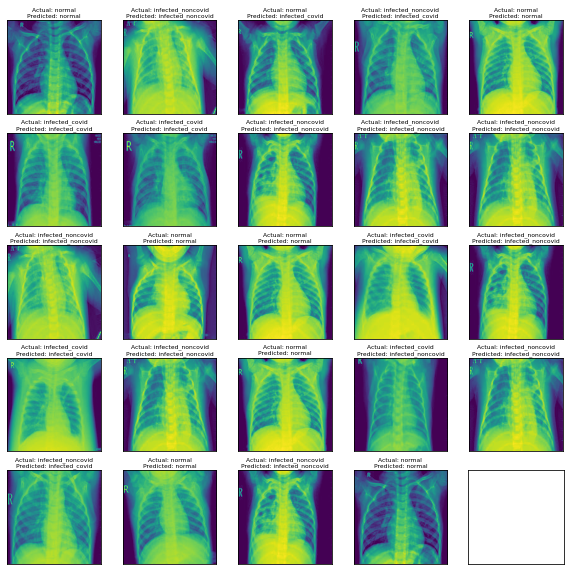

Validation loss: 1.134 - Validation accuracy: 0.833 - Validation F1-score: 0.846 - Validation recall: 0.829


In [34]:
class DualBinaryClassifier(nn.Module):
    def __init__(self, model1_path, model2_path, device='cuda'):
        super().__init__()
        self.device = device
        self.model1 = utils.load_model(model1_path)
        self.model1.to(device)
        self.model2 = utils.load_model(model2_path)
        self.model2.to(device)
    
    def forward(self, x):
        logits = self.model1(x)
        output = F.log_softmax(logits, dim=1)
        infected = (torch.exp(output).max(dim=1)[1] == 1)
        
        new_logits = torch.zeros((logits.shape[0], logits.shape[1]+1)).to(self.device)
        new_logits[:, :-1] = logits
        new_logits[:, 0][infected] = 0
        new_logits[:, 1:][infected] = self.model2(x[infected])
        return new_logits

model = DualBinaryClassifier(model1_path='./models/dual-binary-classifier-1.pt',
                             model2_path='./models/dual-binary-classifier-2.pt')

dataloader_args = {
    'dataset_cls'    : LungDataset,
    'root_dir'       : './dataset',
    'test_transform' : test_transform,
    'batch_size'     : 64,
}
_, _, val_loader = utils.get_dataloaders(**dataloader_args)

results = utils.run_model(model, val_loader, show_results=True)

print(f"Validation loss: {results['loss']:.3f} -",
      f"Validation accuracy: {results['accuracy']:.3f} -",
      f"Validation F1-score: {results['f1']:.3f} -",
      f"Validation recall: {results['recall']:.3f}")